<a href="https://colab.research.google.com/github/Sharif1813/ML-task01/blob/main/ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', 999)

In [ ]:
bank = pd.read_csv('bank-additional-full.csv', sep = ";")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank = bank.rename(index=str, columns={"y": "deposit"})

In [ ]:
bank.shape

(41188, 21)

In [ ]:
bank.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [ ]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [ ]:
num_colmuns = []
cat_columns = []
for name, type in dict(bank.dtypes).items():
        if type =='int64' or type == 'float64':
            num_colmuns.append(name)
        else:
            cat_columns.append(name) 

[Text(0, 0, 'age'),
 Text(0, 0, 'duration'),
 Text(0, 0, 'campaign'),
 Text(0, 0, 'pdays'),
 Text(0, 0, 'previous'),
 Text(0, 0, 'emp.var.rate'),
 Text(0, 0, 'cons.price.idx'),
 Text(0, 0, 'cons.conf.idx'),
 Text(0, 0, 'euribor3m'),
 Text(0, 0, 'nr.employed')]

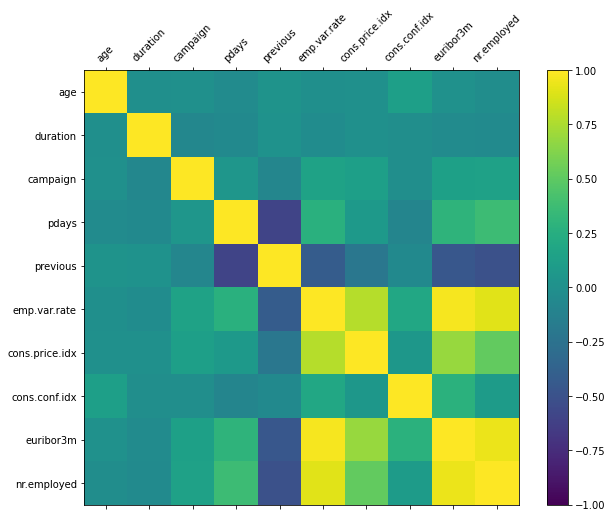

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(bank.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(num_colmuns, rotation = 45)
ax.set_yticklabels(num_colmuns)

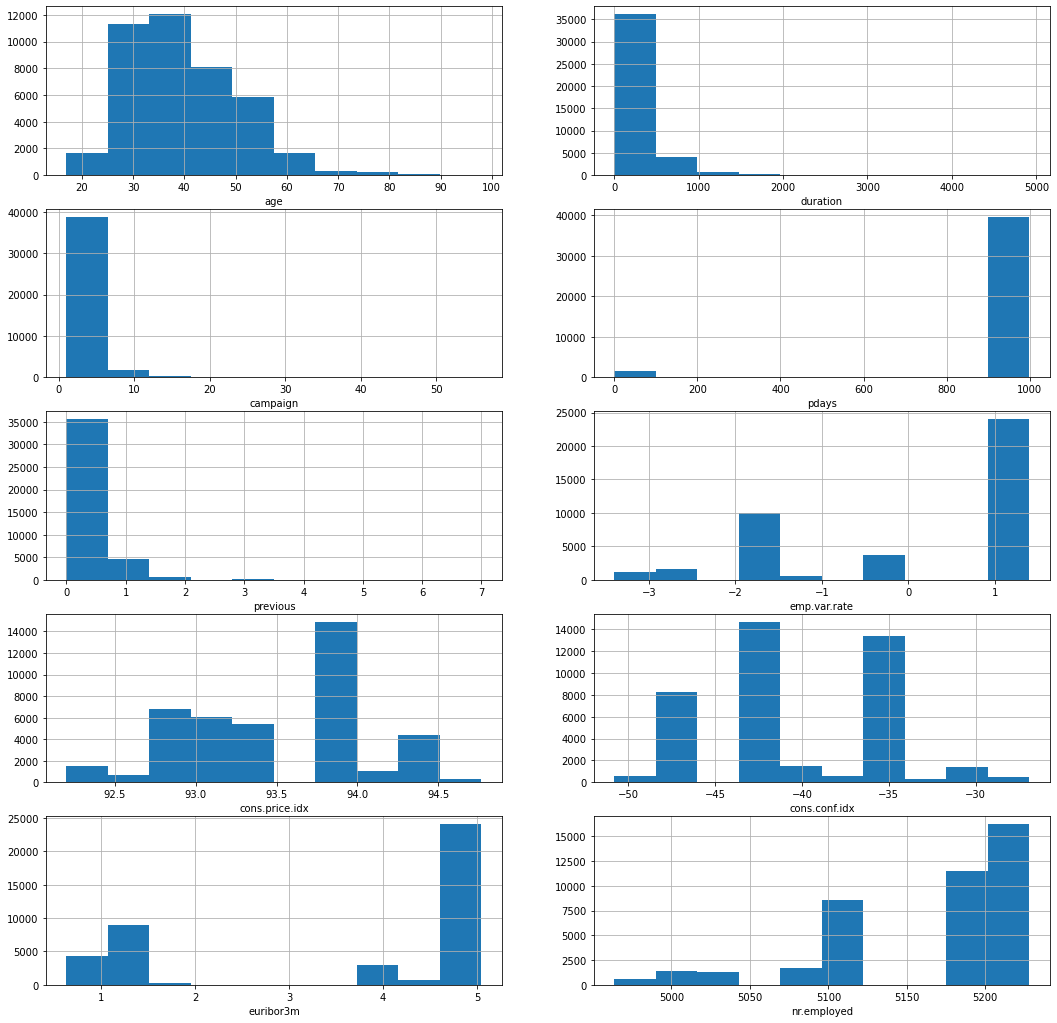

In [ ]:
fig = plt.figure(figsize=(18,18))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = bank[num_colmuns[r]].hist()
    ax.set_xlabel(num_colmuns[r])

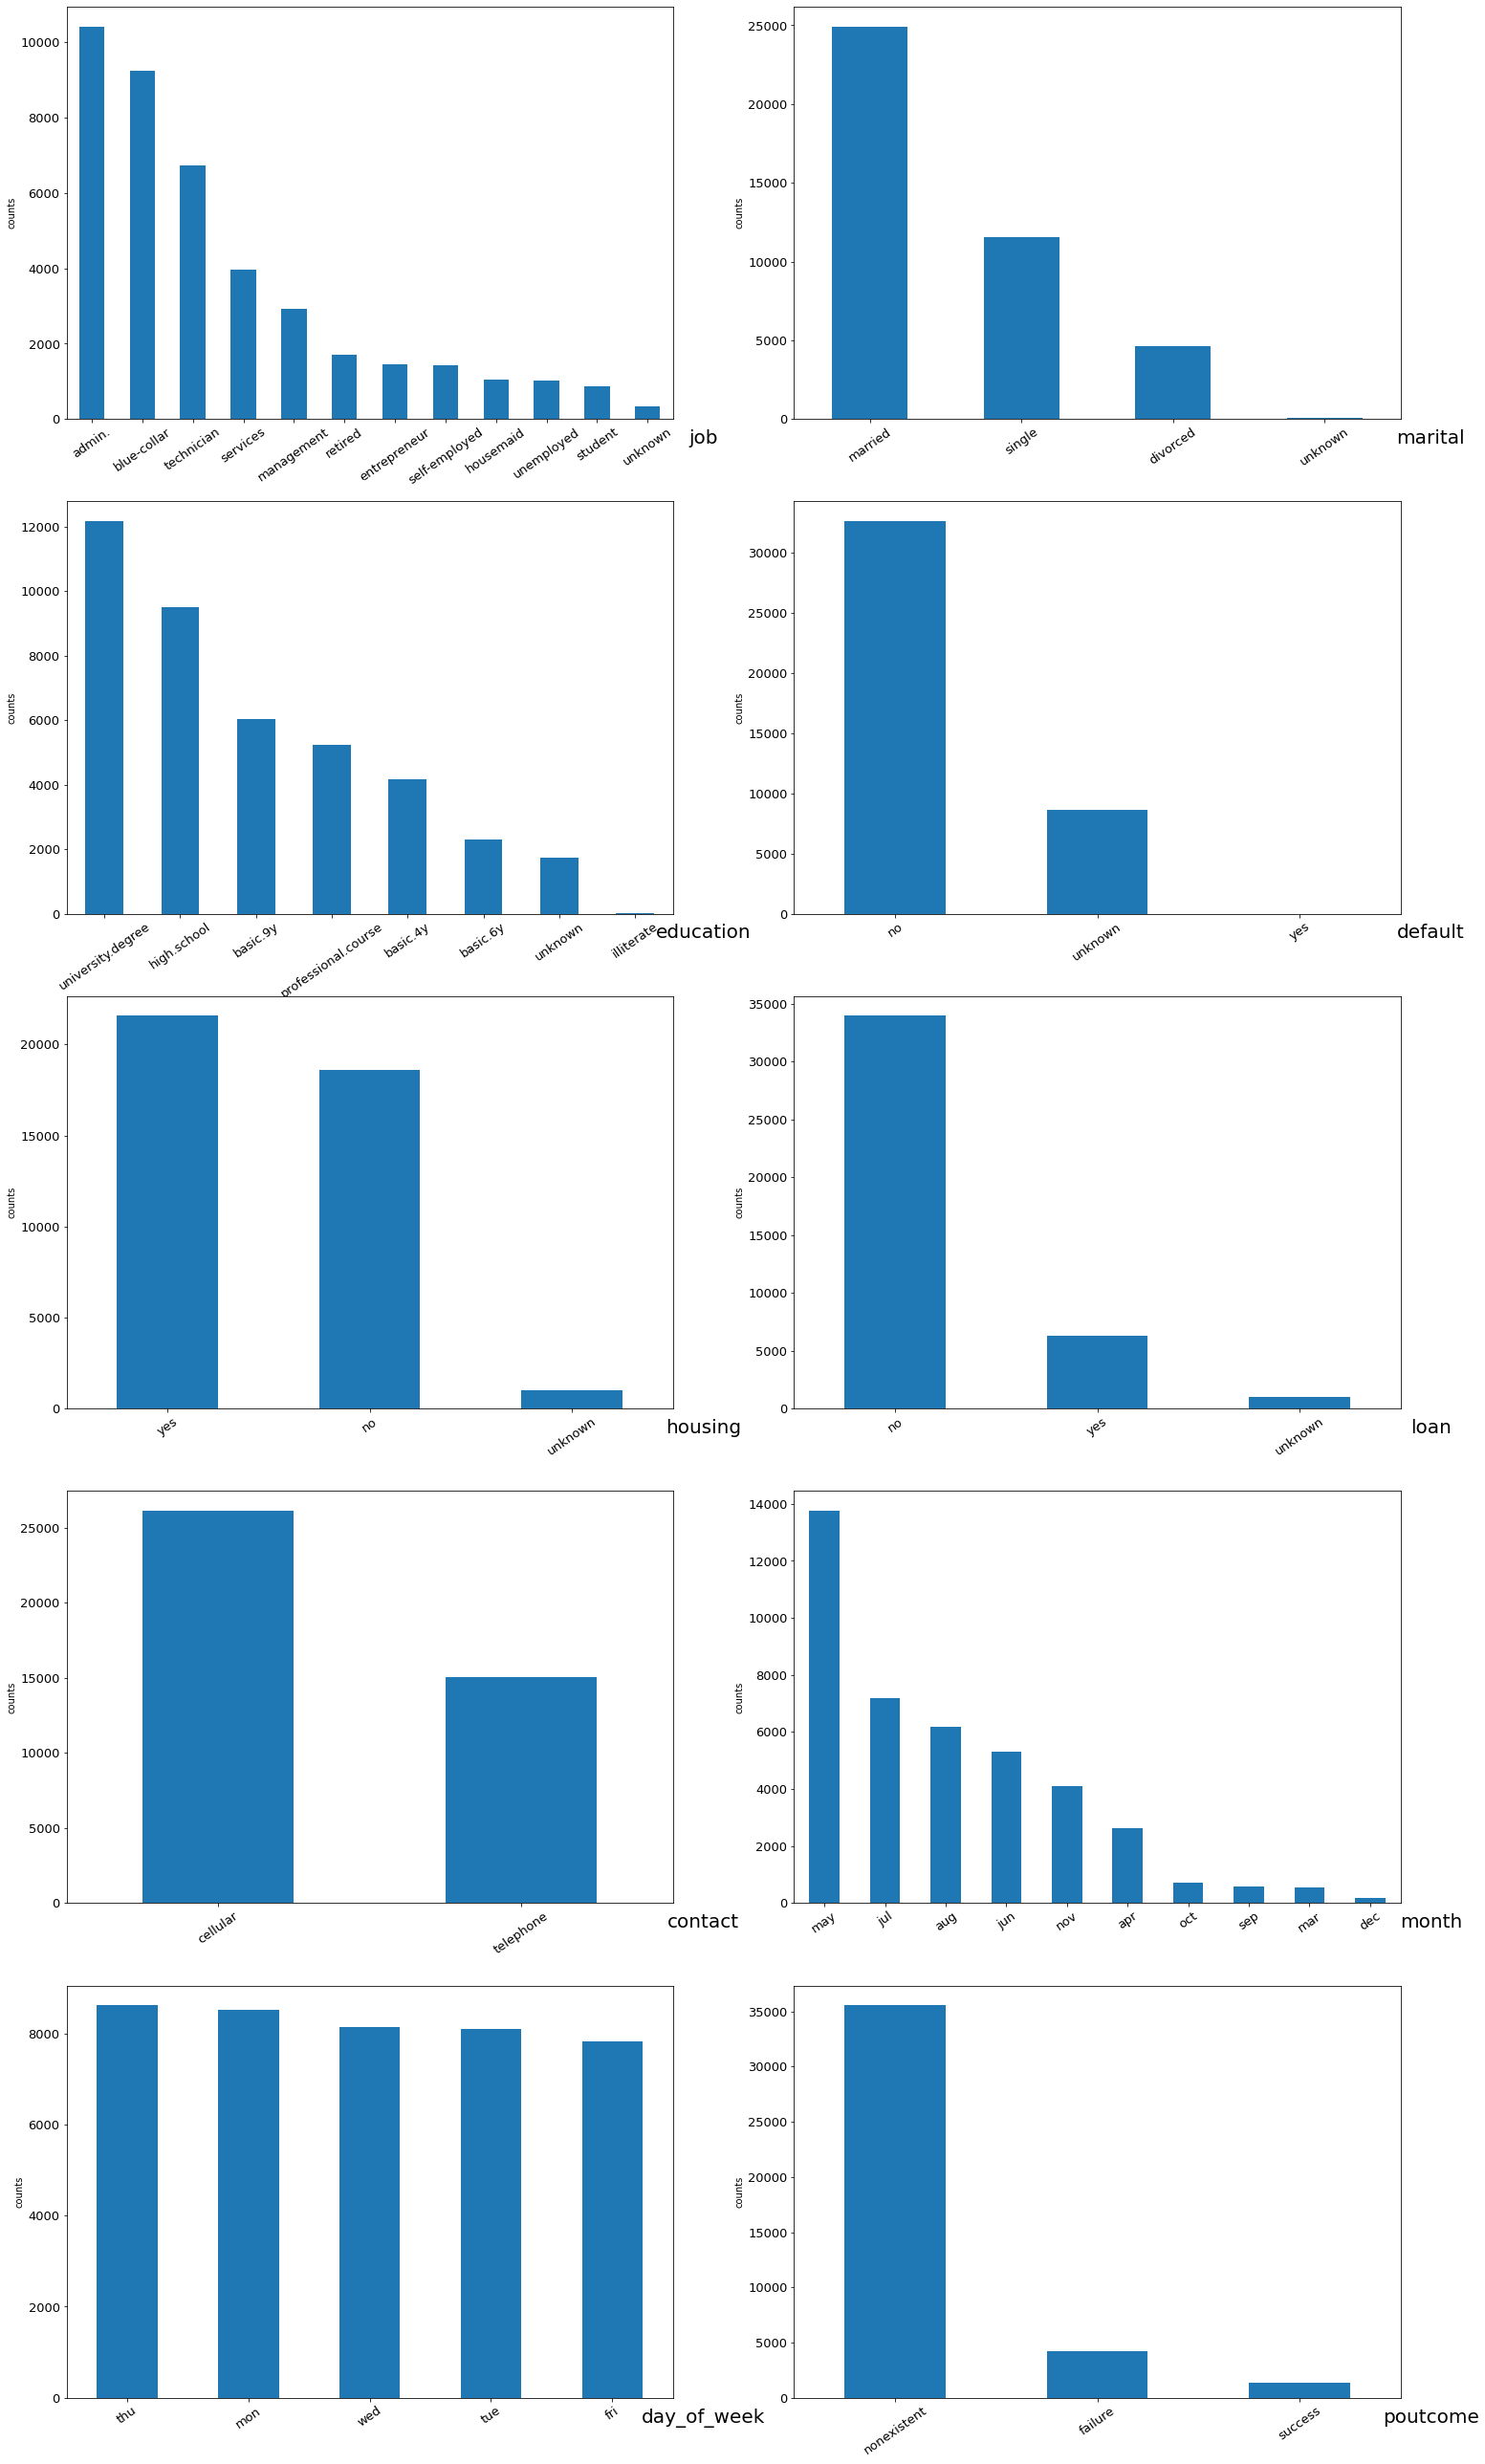

In [ ]:
fig = plt.figure(figsize=(25,46))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = bank[cat_columns[r]].value_counts().plot(kind = 'bar', rot=35, fontsize = 13)
    ax.set_xlabel(cat_columns[r],fontsize = 20)
    ax.xaxis.set_label_coords(1.05, -0.025)
    ax.set_ylabel('counts')

Text(0.5, 1.0, 'Percentage of each Term Deposit Status')

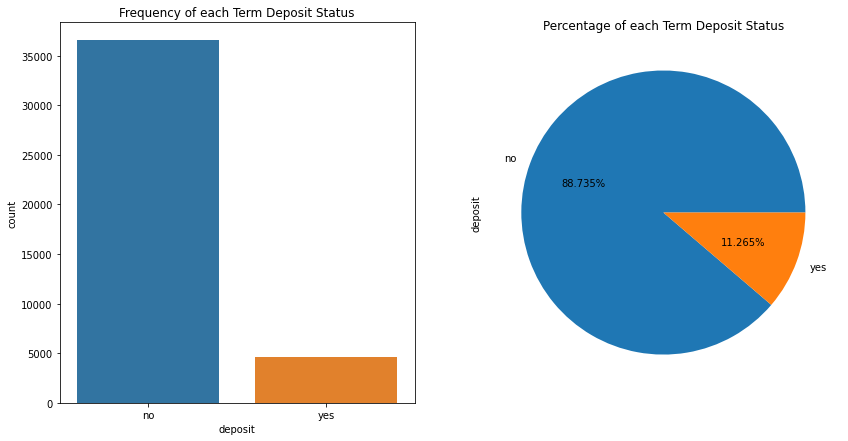

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='deposit',data=bank, ax=axs[0])
axs[0].set_title("Frequency of each Term Deposit Status")
bank.deposit.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.3f%%')
axs[1].set_title("Percentage of each Term Deposit Status")

Data pre processing

In [ ]:
null_counts = bank.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


In [ ]:
print("Data types and their frequency\n{}".format(bank.dtypes.value_counts()))

Data types and their frequency
object     11
int64       5
float64     5
dtype: int64


In [ ]:
object_columns_df = bank.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

job              housemaid
marital            married
education         basic.4y
default                 no
housing                 no
loan                    no
contact          telephone
month                  may
day_of_week            mon
poutcome       nonexistent
deposit                 no
Name: 0, dtype: object


In [ ]:
bank_prepared = bank.drop(['month', 'day_of_week'], axis = 1)

In [ ]:
cols = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'poutcome']
for name in cols:
    print(name,':')
    print(bank_prepared[name].value_counts(),'\n')

job :
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital :
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education :
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default :
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing :
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan :
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

contact :
cellular     26144
telephon

nominal

In [ ]:
Nominal = ['job','marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
dummies = pd.get_dummies(bank[Nominal])

bank_prepared = pd.concat([bank_prepared, dummies],axis=1)
bank_prepared = bank_prepared.drop(Nominal, axis = 1)

ordinal

In [ ]:
bank_prepared['education'] = bank_prepared['education'].replace(['basic.4y','basic.6y','basic.9y'], 'basic')

mapping_dict = {
    "education": {
        "university.degree": 5,
        "professional.course": 4,
        "basic": 3,
        "high.school": 2,
        "illiterate": 1,
        "unknown": 0
    }
}
bank_prepared = bank_prepared.replace(mapping_dict)

In [ ]:
bank_prepared = bank_prepared.drop(['duration'], axis = 1)

In [ ]:
bank_prepared['deposit'] = bank_prepared['deposit'].map(dict(yes=1, no=0))

In [ ]:
bank_prepared['deposit'].value_counts()

0    36548
1     4640
Name: deposit, dtype: int64

training and testing data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix,precision_score, recall_score, accuracy_score,classification_report,roc_curve,f1_score    
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.utils import resample
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
validation_size = 0.20
seed = 10
bank_train, bank_test = train_test_split(bank_prepared, test_size=validation_size, random_state=seed)

In [ ]:
X_train = bank_train.drop(['deposit'], axis = 1)
Y_train = bank_train['deposit']
X_test = bank_test.drop(['deposit'], axis = 1)
Y_test = bank_test['deposit'] 

In [ ]:
Y_train.value_counts(normalize = True)

0    0.887344
1    0.112656
Name: deposit, dtype: float64

In [ ]:
Y_test.value_counts(normalize = True)

0    0.887351
1    0.112649
Name: deposit, dtype: float64

logistic regression, KNN, decision tree, Naive bias

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
results = []
names = []
roc = []
for name, model in models:
    cv_results = cross_val_score(model, X_train.values, Y_train.values, cv = 10, scoring = 'accuracy')
    y_train_pred = cross_val_predict(model, X_train.values, Y_train.values, cv = 10)
    roc_results = cross_val_score(model, X_train.values, Y_train.values, cv=10, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    roc.append(roc_results)
    print("{}\nAccuracy: {:.4f}({:.4f})".format(name, cv_results.mean(), cv_results.std()))
    print("Recall: {:.4f}".format(recall_score(Y_train.values, y_train_pred)))
    print("Precision: {:.4f}".format(precision_score(Y_train.values, y_train_pred)))
    print("ROC: {:.4f}".format(roc_results.mean()))
    print('confusition_matrix')
    print(confusion_matrix(Y_train.values, y_train_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression
Accuracy: 0.9004(0.0027)
Recall: 0.1961
Precision: 0.7089
ROC: 0.7632
confusition_matrix
[[28939   299]
 [ 2984   728]]
KNN
Accuracy: 0.8892(0.0035)
Recall: 0.2869
Precision: 0.5145
ROC: 0.7265
confusition_matrix
[[28233  1005]
 [ 2647  1065]]
Decision Tree
Accuracy: 0.8375(0.0052)
Recall: 0.3378
Precision: 0.3051
ROC: 0.6236
confusition_matrix
[[26382  2856]
 [ 2458  1254]]
Naive Bayes
Accuracy: 0.8223(0.0030)
Recall: 0.5081
Precision: 0.3189
ROC: 0.7604
confusition_matrix
[[25209  4029]
 [ 1826  1886]]


In [ ]:
bank_train['deposit'].value_counts()

0    29238
1     3712
Name: deposit, dtype: int64

In [ ]:
bank_majority = bank_train[bank_train['deposit']==0]
bank_minority = bank_train[bank_train['deposit']==1]

bank_minority_upsampled = resample(bank_minority, 
                                 replace = True,    
                                 n_samples = 29238,
                                 random_state=10)
 
bank_upsampled = pd.concat([bank_majority, bank_minority_upsampled],axis=0)
 
bank_upsampled['deposit'].value_counts()

0    29238
1    29238
Name: deposit, dtype: int64

balanced data training

In [ ]:
X_train_bal = bank_upsampled.drop(['deposit'], axis = 1)
Y_train_bal = bank_upsampled['deposit']
models_ = []
models_.append(('Logistic Regression', LogisticRegression()))
models_.append(('KNN', KNeighborsClassifier()))
models_.append(('Decision Tree', DecisionTreeClassifier()))
models_.append(('Naive Bayes', GaussianNB()))
results_ = []
names_ = []
roc_ = []
for name, model in models_:
    cv_results_ = cross_val_score(model, X_train_bal.values, Y_train_bal.values, cv = 10, scoring = 'accuracy')
    y_train_pred_ = cross_val_predict(model, X_train_bal.values, Y_train_bal.values, cv = 10)
    results_.append(cv_results_)
    names_.append(name)
    print("{}\nAccuracy: {:.4f}({:.4f})".format(name, cv_results_.mean(), cv_results_.std()))
    print("Recall: {:.4f}".format(recall_score(Y_train_bal.values, y_train_pred_)))
    print("Precision: {:.4f}".format(precision_score(Y_train_bal.values, y_train_pred_)))
    print('confusition_matrix')
    print(confusion_matrix(Y_train_bal.values, y_train_pred_))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression
Accuracy: 0.7219(0.0090)
Recall: 0.7093
Precision: 0.7276
confusition_matrix
[[21474  7764]
 [ 8500 20738]]
KNN
Accuracy: 0.8824(0.0033)
Recall: 0.9878
Precision: 0.8159
confusition_matrix
[[22720  6518]
 [  356 28882]]
Decision Tree
Accuracy: 0.9488(0.0024)
Recall: 0.9985
Precision: 0.9088
confusition_matrix
[[26307  2931]
 [   44 29194]]
Naive Bayes
Accuracy: 0.7085(0.0034)
Recall: 0.5976
Precision: 0.7679
confusition_matrix
[[23958  5280]
 [11765 17473]]


In [ ]:
columns = list(bank_upsampled)
columns.remove('deposit')
num_colmuns.remove('duration')

cat_list_feature = []
num_list_feature = []
for i in columns:
    if i not in num_colmuns:
        cat_list_feature.append(i)
    else:
        num_list_feature.append(i)

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_list_feature)),
        ('standardized', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_list_feature))
    ])

In [ ]:
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [ ]:
X_train_scaled = full_pipeline.fit_transform(bank_upsampled)

In [ ]:
models__ = []
models__.append(('Logistic Regression Scaled', LogisticRegression()))
models__.append(('KNN Scaled', KNeighborsClassifier()))
models__.append(('Decision Tree Scaled', DecisionTreeClassifier()))
models__.append(('Naive Bayes Scaled', GaussianNB()))
results__ = []
names__ = []
roc__ = []

for name, model in models__:
    cv_results__ = cross_val_score(model, X_train_scaled, Y_train_bal.values, cv = 10, scoring = 'accuracy')
    y_train_pred__ = cross_val_predict(model, X_train_scaled, Y_train_bal.values, cv = 10)
    results__.append(cv_results__)
    names__.append(name)
    print("{}\nAccuracy: {:.4f}({:.4f})".format(name, cv_results__.mean(), cv_results__.std()))
    print("Recall: {:.4f}".format(recall_score(Y_train_bal.values, y_train_pred__)))
    print("Precision: {:.4f}".format(precision_score(Y_train_bal.values, y_train_pred__)))
    print('confusition_matrix')
    print(confusion_matrix(Y_train_bal.values, y_train_pred__))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression Scaled
Accuracy: 0.7352(0.0065)
Recall: 0.6655
Precision: 0.7733
confusition_matrix
[[23534  5704]
 [ 9779 19459]]
KNN Scaled
Accuracy: 0.8861(0.0047)
Recall: 0.9872
Precision: 0.8212
confusition_matrix
[[22953  6285]
 [  374 28864]]
Decision Tree Scaled
Accuracy: 0.9486(0.0035)
Recall: 0.9985
Precision: 0.9075
confusition_matrix
[[26263  2975]
 [   43 29195]]
Naive Bayes Scaled
Accuracy: 0.7060(0.0064)
Recall: 0.7331
Precision: 0.6954
confusition_matrix
[[19849  9389]
 [ 7805 21433]]


In [ ]:
ensembles = []
ensembles.append(('Ada Boost', AdaBoostClassifier()))
ensembles.append(('Gradient Boosting Machine', GradientBoostingClassifier()))
ensembles.append(('Random Forest', RandomForestClassifier()))

results___ = []
names___  = []
for name, model in ensembles:
    cv_results___ = cross_val_score(model, X_train_scaled, Y_train_bal.values, cv = 10, scoring = 'accuracy')
    y_train_pred___ = cross_val_predict(model, X_train_scaled, Y_train_bal.values, cv = 10)
    results___.append(cv_results___)
    names___.append(name)
    print("{}\nAccuracy: {:.4f}({:.4f})".format(name, cv_results___.mean(), cv_results___.std()))
    print("Recall: {:.4f}".format(recall_score(Y_train_bal.values, y_train_pred___)))
    print("Precision: {:.4f}".format(precision_score(Y_train_bal.values, y_train_pred___)))
    print('confusition_matrix')
    print(confusion_matrix(Y_train_bal.values, y_train_pred___))

Ada Boost
Accuracy: 0.7441(0.0049)
Recall: 0.6262
Precision: 0.8195
confusition_matrix
[[25206  4032]
 [10930 18308]]
Gradient Boosting Machine
Accuracy: 0.7575(0.0033)
Recall: 0.6513
Precision: 0.8269
confusition_matrix
[[25252  3986]
 [10194 19044]]
Random Forest
Accuracy: 0.9670(0.0015)
Recall: 0.9987
Precision: 0.9389
confusition_matrix
[[27338  1900]
 [   38 29200]]


Random Forest training

In [ ]:
param_grid = [
        {'n_estimators': [200,500], 
         'max_features': [4, 6, 8]}
]
bank_RF = RandomForestClassifier(n_jobs=-1, random_state=42)
grid_search = GridSearchCV(bank_RF, param_grid, cv = 5)
grid_search.fit(X_train_scaled, Y_train_bal.values)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [200, 500]}])

In [ ]:
GridSearchCV(cv=5, error_score='raise',
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       param_grid=[{'n_estimators': [200, 500], 'max_features': [4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                              random_state=42),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [200, 500]}],
             return_train_score=True)

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 200}

In [ ]:
{'max_features': 8, 'n_estimators': 200}

{'max_features': 8, 'n_estimators': 200}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

RandomForestClassifier(max_features=8, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
cv_clf = grid_search.cv_results_
for mean_score, params in zip(cv_clf["mean_test_score"], cv_clf["params"]):
    print(mean_score.mean(), params)

0.9629078628080681 {'max_features': 4, 'n_estimators': 200}
0.9634721904610398 {'max_features': 4, 'n_estimators': 500}
0.964104924877574 {'max_features': 6, 'n_estimators': 200}
0.9637116017052199 {'max_features': 6, 'n_estimators': 500}
0.9648060645955191 {'max_features': 8, 'n_estimators': 200}
0.9645837400551758 {'max_features': 8, 'n_estimators': 500}


In [ ]:
best_model = grid_search.best_estimator_
X_test_scaled = full_pipeline.fit_transform(X_test)
final_predictions = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(Y_test.values,final_predictions)
Recall = recall_score(Y_test.values,final_predictions)
Precision = precision_score(Y_test.values,final_predictions)
F1_Score = f1_score(Y_test.values,final_predictions)
acu_score = roc_auc_score(Y_test.values,final_predictions)
print("Final_Accuracy: {:.4f}".format(final_accuracy))
print("Recall: " + str(Recall))
print("Recall: " + str(Precision))
print("Recall: " + str(F1_Score))
print("acu_area: " + str(acu_score))

Final_Accuracy: 0.8894
Recall: 0.24892241379310345
Recall: 0.5191011235955056
Recall: 0.33648943918426805
acu_area: 0.6098237239964149


In [ ]:
confusion_matrix(Y_test.values,final_predictions)

array([[7096,  214],
       [ 697,  231]])